# 오토 인코더 란

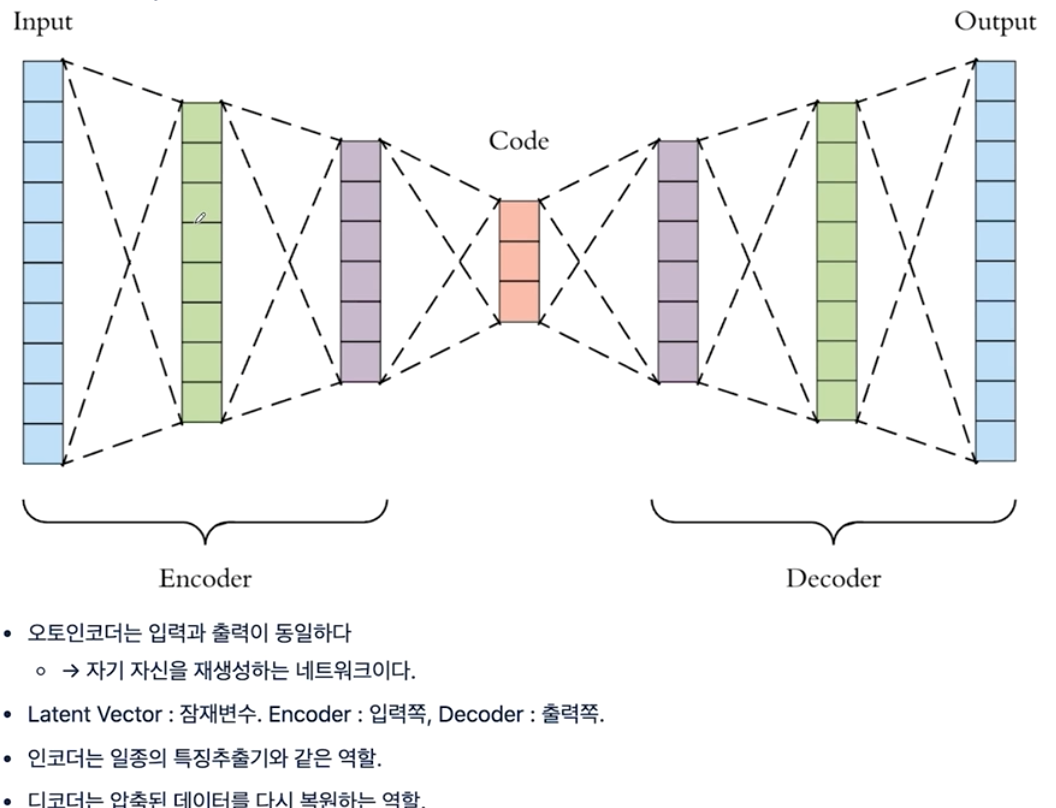

## MNIST로 오토인코더 해보자

In [1]:
import numpy as np
import tensorflow as tf

In [16]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


5


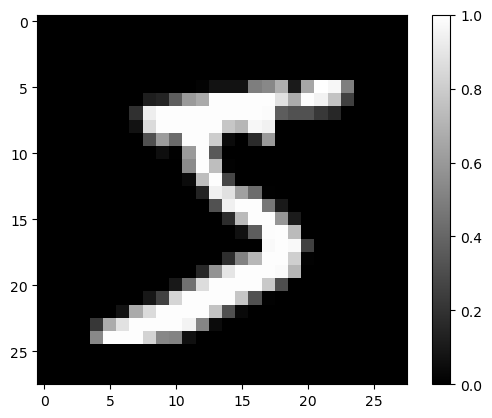

In [17]:
import matplotlib.pyplot as plt

print(train_Y[0])

plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show();

In [18]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

# 784 -> 64 -> 784
model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


오토인코더는 자기 자신을 비교하는 것!

In [19]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0498
Epoch 2/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 3/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 4/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 5/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 6/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 7/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 8/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 9/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 10/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0062


자기자신을 예측한다는 것은...
- 자기자신의 모양, 이미지를 그대로 예측한다!

1/1 [==============================] - 0s 10ms/step


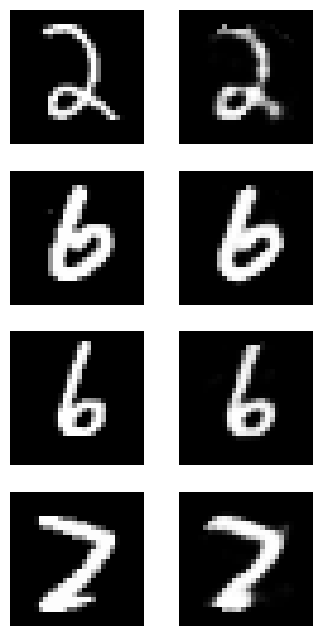

313/313 [==============================] - 1s 2ms/step - loss: 0.0060


0.006025181617587805

In [20]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    
plt.show();

model.evaluate(test_X, test_X)

### CNN으로 해보자

In [21]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid'),
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                200768    
                                                                 
 dense_10 (Dense)            (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)      

In [22]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 6s 5ms/step - loss: 0.0751
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0303
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0223
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0191
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0172
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0164
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0159
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0156
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0153
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0151


1/1 [==============================] - 0s 18ms/step


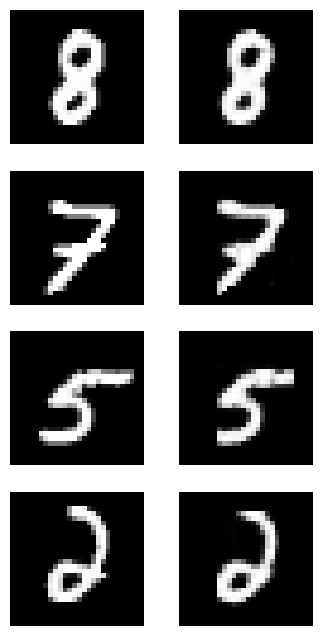

313/313 [==============================] - 1s 2ms/step - loss: 0.0146


0.014564896933734417

In [23]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    
plt.show();

model.evaluate(test_X, test_X)

활성화 함수 Relu 말고 ELU도 있다.

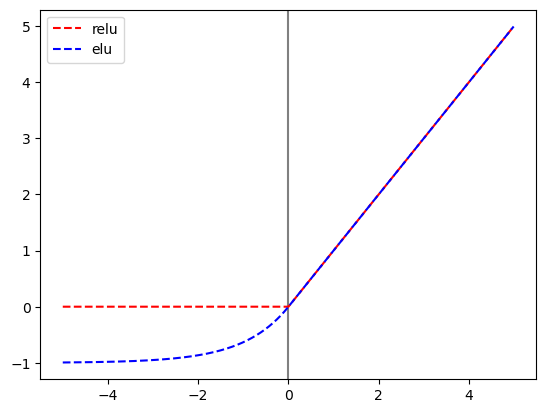

In [27]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'b--', label='elu')
plt.legend()
plt.show();

### CNN + elu

In [28]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid'),
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0521
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0160
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0109
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0093
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0086
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0081
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0077
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0074
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0072
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0070


1/1 [==============================] - 0s 19ms/step


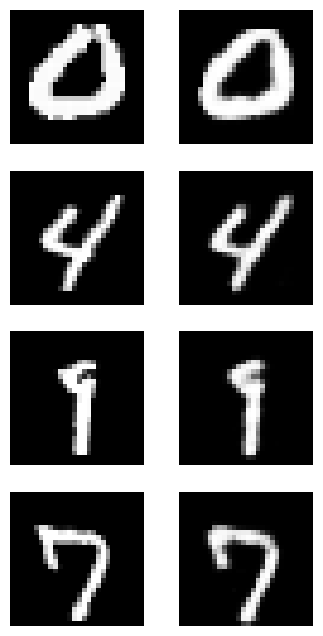

313/313 [==============================] - 1s 3ms/step - loss: 0.0067


0.006706186104565859

In [29]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    
plt.show();

model.evaluate(test_X, test_X)

예측 화질이 실제와 거의 비슷하게 되었다.
- 784픽셀의 이미지를 64개의 특성으로 거의 완벽하게 추출했다고 볼수 있다.

### 64 layer의 특성 추출 (잠재변수 벡터 확보)

In [31]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

1875/1875 [==============================] - 2s 1ms/step
(60000, 64)
[ 1.8605431  17.455418   20.684235    7.450121   -1.          6.027777
 -0.9999998  16.23656    14.378578   28.337608   -0.99999994 19.394505
 26.767138   11.44548    -1.         33.203007   -1.         12.864357
 17.432209   -1.         -1.          5.4444537  19.986248   -0.99999976
  7.1121464  14.438249   18.045362   -0.99914247 -1.         -0.99999994
 15.523367   -0.99999994 -0.99999976 -1.         -1.          9.421134
  0.81036603 17.269272    9.073441   11.0353775  13.147174   -1.
 -0.99999994  6.447587   11.987215   -1.         13.382182   18.208143
 17.727812   23.811573   -0.9999973  13.46562    27.473665   -0.99746084
 -1.         18.99912    20.48226    10.973208   -1.         -1.
  6.009249   -0.9999997  -0.9999991  -0.99999994]


하나의 숫자 이미지를 64개의 벡터로 특성을 나타낸 것

### 군집화 해보자

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [33]:
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[7 5 1 ... 8 4 2]
(10, 64)
[ 4.669098   21.04054    16.978197    7.3243737  -1.         17.137396
 -1.         18.071701   15.79888    25.641811   -1.         17.011345
 18.854456   16.78611    -1.         17.508177   -1.         20.14425
 20.504631   -1.         -1.          3.387152   18.702475   -0.99999994
 15.089311   16.29402    17.962011   -0.999722   -1.         -1.
 20.990667   -1.         -0.9999998  -1.         -1.         16.297861
 17.307138   20.387444   23.263405   15.419807   15.429355   -1.
 -1.         14.726119   26.840046   -1.         13.257283   16.63886
 16.01397    20.003313   -0.99999905 22.711174   17.793087   -0.9907243
 -1.         14.654857   14.161214   17.712868   -1.         -1.
 20.330841   -0.9999998  -0.9999996  -1.        ]


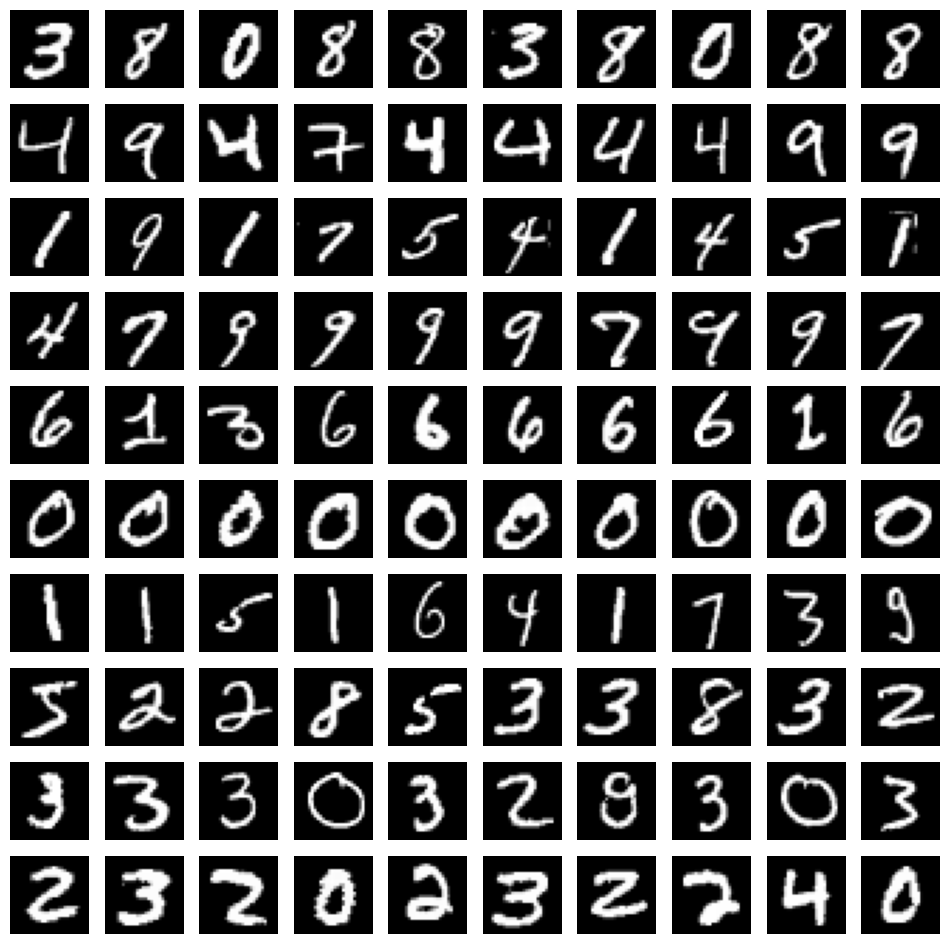

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28, 28), cmap='gray')
        plt.axis('off')
        
plt.show()

1번째 줄을 보면 3과 8을 유사하게 보고있다는 것을 알수 있다.<br>
4번째 줄을 보면 7과 9를 유사하게 보고있다는 것을 알수 있다.<br>
6번째 줄을 보면 0은 0으로 군집화를 매우 잘하고 있다.

### t-SNE
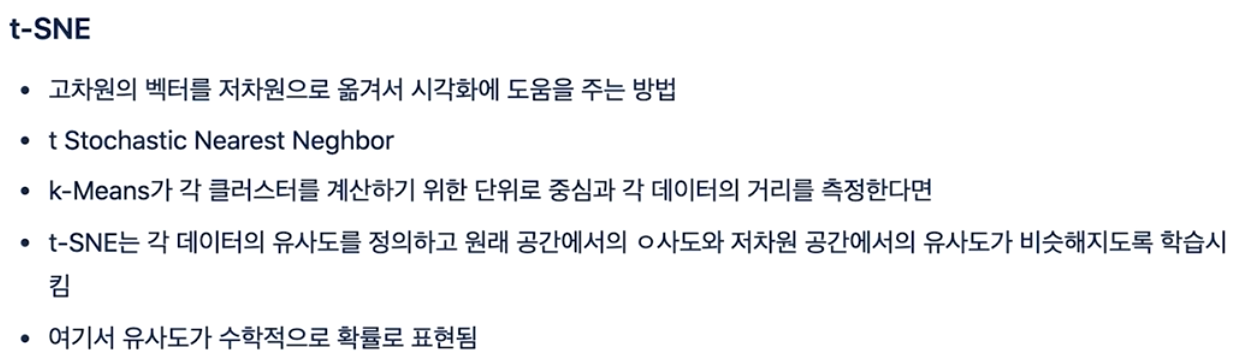

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

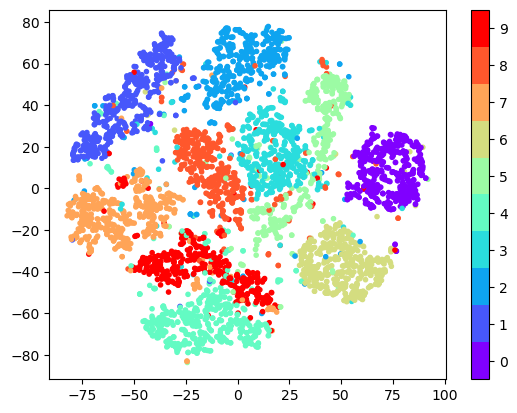

In [38]:
cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

군집화 점에 라벨까지 추가한 코드
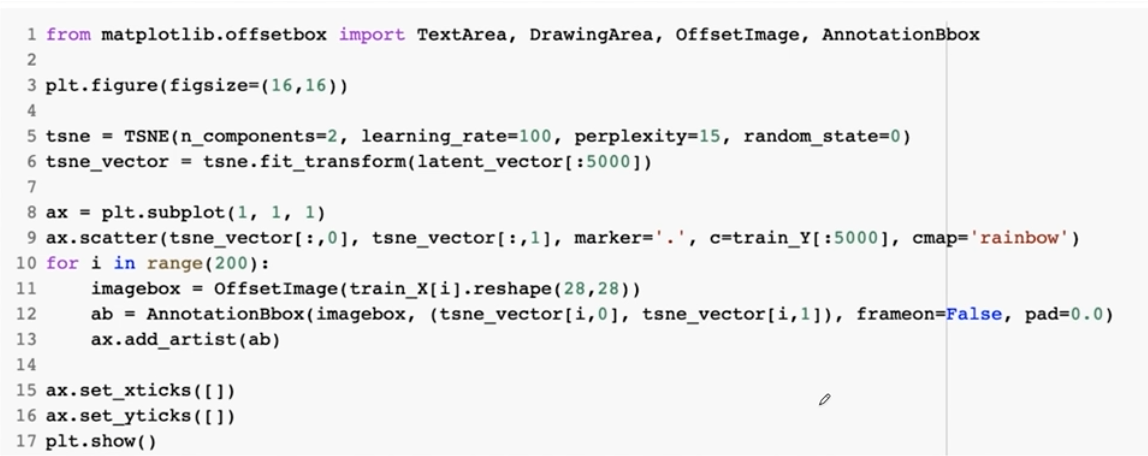

오토엔코더는 라벨을 가지고 학습하는게 아니라 자기 자신을 학습한다.<br>
자신의 특징을 학습한다...